In [21]:
%matplotlib inline
import geopandas as gpd
import requests, pandas as pd
from shapely.geometry import Point

In [22]:
state_df = gpd.read_file("cb_2015_us_state_20m.shp")
state_df.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US48,676634395761,19027462392,48,00,Texas,48,01779801,TX,"POLYGON ((-106.623445 31.914034, -106.630114 3..."
1,0400000US06,403488955894,20477992907,06,00,California,06,01779778,CA,"(POLYGON ((-118.593969 33.467198, -118.484785 ..."
2,0400000US21,102266253024,2389483091,21,00,Kentucky,21,01779786,KY,"POLYGON ((-89.544434 36.57451, -89.47934599999..."
3,0400000US13,149169759045,4740824950,13,00,Georgia,13,01705317,GA,"POLYGON ((-85.605165 34.984678, -85.4743388431..."
4,0400000US55,140269484183,29365442607,55,00,Wisconsin,55,01779806,WI,"(POLYGON ((-86.934276 45.421149, -86.835748999..."


In [25]:
cities_df = pd.read_csv("Locations.csv", usecols = ["Longitude", "Latitude"])
cities_df.dropna(inplace = True)

geometry = [Point(xy) for xy in zip(cities_df.Longitude, cities_df.Latitude)]
cities_coords = gpd.GeoDataFrame(cities_df, crs = state_df.crs, geometry=geometry)

located_cities = gpd.sjoin(cities_coords, state_df, how = 'left', op = 'within')
located_cities.head()

,Longitude,Latitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,-86.300942,32.377447,POINT (-86.30094200000001 32.377447),37,0400000US01,131173369432,4593984687,01,00,Alabama,01,01779775,AL
1,-134.410467,58.302197,POINT (-134.410467 58.302197),13,0400000US02,1477946338495,245391672906,02,00,Alaska,02,01785533,AK
2,-112.097094,33.448097,POINT (-112.097094 33.448097),42,0400000US04,294204474990,1027559124,04,00,Arizona,04,01779777,AZ
3,-92.288761,34.746758,POINT (-92.28876099999999 34.746758),23,0400000US05,134769279101,2962525273,05,00,Arkansas,05,00068085,AR
4,-121.493411,38.576572,POINT (-121.493411 38.576572),1,0400000US06,403488955894,20477992907,06,00,California,06,01779778,CA


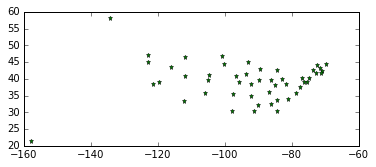

In [26]:
located_cities.plot(marker='*', color='green', markersize=5)